# Question 1 - Classifier

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

## Data Preprocessing

In [2]:
ckd_df = pd.read_csv("../data/ckd.csv")
ckd_df.head()

,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,0,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,3,68,80,1.010,3,2,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [3]:
ckd_df.describe()

,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Class
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772,0.272152
std,45.754781,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364,0.446483
min,0.000000,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000,0.000000
25%,39.250000,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,4.500000,0.000000
50%,78.500000,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,4.950000,0.000000
75%,117.750000,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,5.600000,1.000000
max,157.000000,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


In [4]:
ckd_df.isna().sum()

Unnamed: 0                 0
Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Class                      0
dtype: int64

In [5]:
req_df = ckd_df[["Hemoglobin", "Blood Glucose Random", "Class"]]
req_df

,Hemoglobin,Blood Glucose Random,Class
0,11.2,117,1
1,9.5,70,1
2,10.8,380,1
3,5.6,157,1
4,7.7,173,1
...,...,...,...
153,15.7,140,0
154,16.5,75,0
155,15.8,100,0
156,14.2,114,0


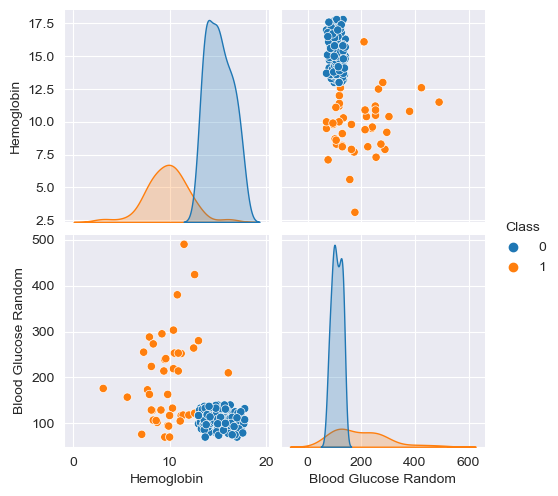

In [6]:
sns.pairplot(req_df, hue="Class")
plt.show()

In [7]:
std_glucose = req_df["Blood Glucose Random"].std()
std_glucose

64.93983223609541

## Dataset Split for Train and Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(req_df[["Hemoglobin", "Blood Glucose Random"]], req_df["Class"], test_size=0.25, random_state=69)

In [9]:
X_train

,Hemoglobin,Blood Glucose Random
58,14.2,97
19,8.2,128
97,13.4,120
23,8.3,273
67,14.5,112
...,...,...
49,14.5,131
148,15.0,99
90,15.0,102
107,15.0,95


## KNN modelling

In [10]:
classifier = KNeighborsClassifier()

In [11]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
predictions = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Accuracy: ")

Accuracy: 


In [26]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, predictions)
c_matrix

array([[29,  0],
       [ 4,  7]])

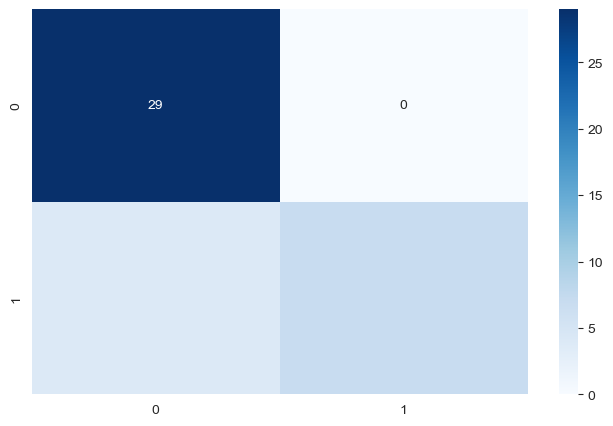

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(c_matrix, annot=True, cmap="Blues")
plt.show()

In [19]:
! pip install --upgrade seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 40.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.5 MB 23.8 kB/s eta 0:03:03
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/ramnaresh/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/Users/ramnaresh/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "/Users/ramnaresh/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "/Users/ramnaresh/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 98, in read
    data: bytes